In [1]:
%matplotlib inline
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

In [4]:
d2l.set_figsize()
img = d2l.Image.open('../pytorch/img/cat1.jpg')

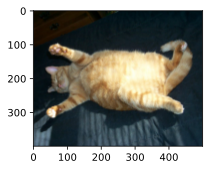

In [5]:
d2l.plt.imshow(img)

In [6]:
def apply(img, aug, num_rows=2, num_cols=4, scale=1.5):
    Y = [aug(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale=scale)

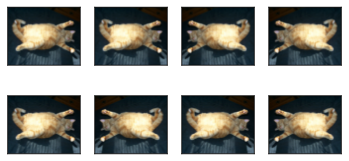

In [7]:
apply(img, torchvision.transforms.RandomHorizontalFlip())

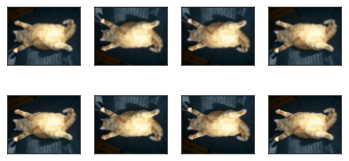

In [8]:
apply(img, torchvision.transforms.RandomVerticalFlip())

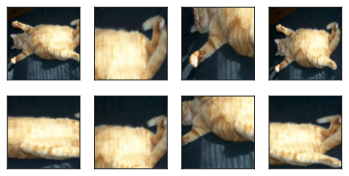

In [9]:
shape_aug = torchvision.transforms.RandomResizedCrop((200, 200),
                                                    scale=(0.1, 1),
                                                    ratio=(0.5, 2))
apply(img, shape_aug)

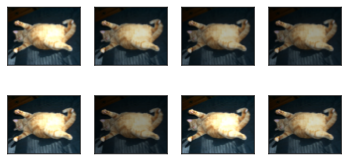

In [10]:
apply(img, torchvision.transforms.ColorJitter(
brightness=0.5, contrast=0, saturation=0, hue=0))

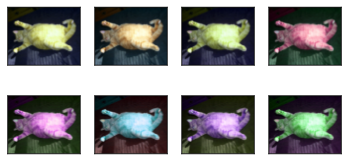

In [11]:
apply(img, torchvision.transforms.ColorJitter(
brightness=0, contrast=0, saturation=0, hue=0.5))

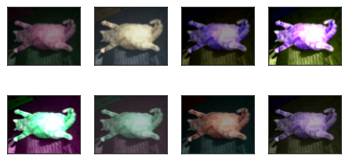

In [12]:
apply(img, torchvision.transforms.ColorJitter(
brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5))

In [13]:
augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(
brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    torchvision.transforms.RandomResizedCrop((200, 200),
                                                    scale=(0.1, 1),
                                                    ratio=(0.5, 2))
])

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../pytorch/data/cifar-10-python.tar.gz to ../pytorch/data


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

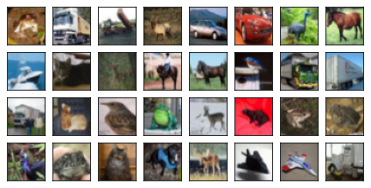

In [15]:
all_images = torchvision.datasets.CIFAR10(train=True,
                                         root='../pytorch/data',
                                         download=True)
d2l.show_images([all_images[i][0] for i in range(32)], 4, 8, scale=0.8)

In [16]:
train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ColorJitter(
brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    torchvision.transforms.RandomResizedCrop((200, 200),
                                                    scale=(0.1, 1),
                                                    ratio=(0.5, 2)),
    torchvision.transforms.ToTensor()
])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor()
])

In [17]:
def load_cifar10(is_train, augs, batch_size):
    dataset = torchvision.datasets.CIFAR10(root='../pytorch/data',
                                          train=is_train,
                                          transform=augs,
                                          download=True)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                            shuffle=is_train, 
                                             num_workers=d2l.get_dataloader_workers())
    return dataloader